In [58]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # 데이터 나눔
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import glob, os.path, re
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [43]:
# 각 파일 처리
def load_files(path):
    freqs = []
    results = []
    file_list = glob.glob(path)
    for fname in file_list:
        name = os.path.basename(fname)
        lang = name.split(('-'))[0]
        
        with open(fname,'r',encoding='utf8') as f:
            text =  f.read()
            
        text = text.lower()
        cnt = [0 for n in range(0,26)]
        code_a = ord('a')
        code_z = ord('z')
        
        # a~z 사이 문자 저장
        for ch in text:
            n = ord(ch)
            if code_a <= n <= code_z:
                cnt[n-code_a]+=1
                
        # 정규화 (각 피쳐마다 비율을 일정하게 맞춤)
        total = sum(cnt)
        freq = list(map(lambda n : n/total,cnt))
        
        freqs.append(freq)
        
        # 결과값 리스트 저장
        results.append(lang)
    
    return {'freqs':freqs,'results':results}

In [53]:
path = './lang/train/*.txt'
path2 = './lang/test/*.txt'

data = load_files(path)
test = load_files(path2)
data['freqs'][0]
test['freqs'][0]
data['results']

# 폴더 안의 모든 데이터를 읽어오기
# file_list = glob.glob(link)
# file_list


['en',
 'en',
 'en',
 'en',
 'en',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'id',
 'id',
 'id',
 'id',
 'id',
 'tl',
 'tl',
 'tl',
 'tl',
 'tl']

### 데이터 전 처리

머신러닝 순서
1. 데이터 전 처리
2. 데이터 학습시키기
3. 데이터 예측하기
4. 정답률 출력

In [54]:
# 데이터 학습 시키기
clf = svm.SVC()
clf.fit(data['freqs'],data['results'])

SVC()

In [55]:
# 데이터 예측하기
predict = clf.predict(test['freqs'])
print('결과 값 :',predict)

결과 값 : ['en' 'en' 'fr' 'fr' 'id' 'id' 'tl' 'tl']


In [57]:
score = clf.score(test['freqs'],test['results'])
print('정답률 :',score)


정답률 : 1.0


In [59]:
cl_report = metrics.classification_report(test['results'],predict)
print(cl_report)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [62]:
data

{'freqs': [[0.07595212187159957,
   0.012840043525571273,
   0.04570184983677911,
   0.04613710554951034,
   0.10533188248095757,
   0.015669205658324265,
   0.019151251360174103,
   0.043743199129488576,
   0.07399347116430903,
   0.0017410228509249185,
   0.00544069640914037,
   0.05375408052230685,
   0.026332970620239392,
   0.07747551686615888,
   0.08966267682263329,
   0.016539717083786723,
   0.0,
   0.07769314472252448,
   0.061371055495103376,
   0.08052230685527748,
   0.02589771490750816,
   0.009793253536452665,
   0.014145810663764961,
   0.0006528835690968443,
   0.02002176278563656,
   0.0004352557127312296],
  [0.08417789436031954,
   0.019911768212710148,
   0.030404196971503518,
   0.038869679265529984,
   0.13699773458924527,
   0.017407893167998092,
   0.031238821986407535,
   0.02742339334684631,
   0.07535471563133421,
   0.0026231071896983425,
   0.009777035888875641,
   0.042327411470132345,
   0.024204125432216526,
   0.05353523309884345,
   0.0687969476570883

array([<Axes: title={'center': 'en'}>, <Axes: title={'center': 'fr'}>,
       <Axes: title={'center': 'id'}>, <Axes: title={'center': 'tl'}>],
      dtype=object)

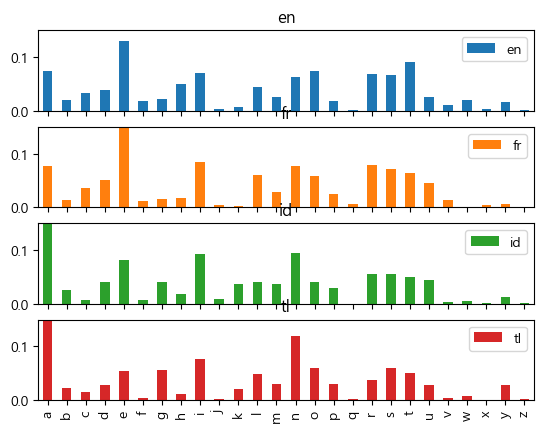

In [63]:
# 그래프 그리기 (시각화)
lang_dic = {}
for i,result in enumerate(data['results']):
    fq = data['freqs'][i]  # data 부분을 가지고 옴
    if not (result in lang_dic):
        lang_dic[result] = fq
    
    for idx, v in enumerate(fq):
        lang_dic[result][idx] = (lang_dic[result][idx]+v) / 2
    
# x축의 눈금을 생성
asc_list = [chr(n) for n in range(97,122+1)]
df = pd.DataFrame(lang_dic,index=asc_list)
df.plot(kind='bar',subplots=True,ylim=(0,0.15))


(0.0, 0.15)

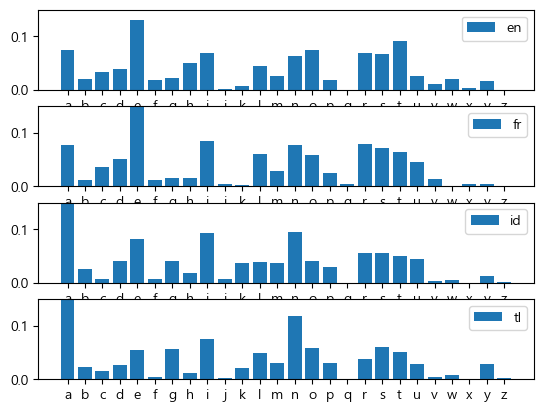

In [69]:
fig,axs = plt.subplots(4)
axs[0].bar(df.index,df['en'],label=df.columns[0])
axs[1].bar(df.index,df['fr'],label=df.columns[1])
axs[2].bar(df.index,df['id'],label=df.columns[2])
axs[3].bar(df.index,df['tl'],label=df.columns[3])
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[0].set_ylim(0,0.15)
axs[1].set_ylim(0,0.15)
axs[2].set_ylim(0,0.15)
axs[3].set_ylim(0,0.15)

In [35]:
# 아스키 코드 : a = 97 / A = 65 -> 1씩 증가하면됨 // 숫자 0 : 48
chr(97-32)
chr(65+32)

'a'

In [40]:
# 파일 이름
name = os.path.basename(file_list[0])
lang = name.split('-')
print(lang[0])

# 1개 파일 내용 읽어오기
cnt = [0 for n in range(0,26)]
with open('./lang/train/'+name,'r',encoding='utf8') as f:
    # print(f.read())
    text = f.read()
    text = text.lower()
    # 알파벳 개수 세기
    # 알파벳 26자 -> 26개의 배열 생성
    # 1개씩 문자를 읽어와서 26개의 배열에 추가
    code_a = ord('a') # ord() : 아스키 코드 변환
    code_z = ord('z')
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z:
            cnt[n-code_a] += 1
        
# 정규화
total = sum(cnt)

# freq = []
# for i in cnt:
#     freq.append((i / total))

freq = list(map(lambda n : n / total, cnt)) # map() : 함수 실행

print(freq)

en
[0.07595212187159957, 0.012840043525571273, 0.04570184983677911, 0.04613710554951034, 0.10533188248095757, 0.015669205658324265, 0.019151251360174103, 0.043743199129488576, 0.07399347116430903, 0.0017410228509249185, 0.00544069640914037, 0.05375408052230685, 0.026332970620239392, 0.07747551686615888, 0.08966267682263329, 0.016539717083786723, 0.0, 0.07769314472252448, 0.061371055495103376, 0.08052230685527748, 0.02589771490750816, 0.009793253536452665, 0.014145810663764961, 0.0006528835690968443, 0.02002176278563656, 0.0004352557127312296]


In [25]:
# name = os.path.basename(file_list[0])
# 폴더의 모든 파일 이름

data = []
results = []

for fname in file_list:
    name = os.path.basename(fname)
    print(name)
    
    # 데이터 가져오기
    
    

    # 앞의 두글자만 출력 split
    lang = name.split('-')
    print(lang)
    results.append(lang[0])


en-1.txt
['en', '1.txt']
en-2.txt
['en', '2.txt']
en-3.txt
['en', '3.txt']
en-4.txt
['en', '4.txt']
en-5.txt
['en', '5.txt']
fr-10.txt
['fr', '10.txt']
fr-6.txt
['fr', '6.txt']
fr-7.txt
['fr', '7.txt']
fr-8.txt
['fr', '8.txt']
fr-9.txt
['fr', '9.txt']
id-11.txt
['id', '11.txt']
id-12.txt
['id', '12.txt']
id-13.txt
['id', '13.txt']
id-14.txt
['id', '14.txt']
id-15.txt
['id', '15.txt']
tl-16.txt
['tl', '16.txt']
tl-17.txt
['tl', '17.txt']
tl-18.txt
['tl', '18.txt']
tl-19.txt
['tl', '19.txt']
tl-20.txt
['tl', '20.txt']


['en',
 'en',
 'en',
 'en',
 'en',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'id',
 'id',
 'id',
 'id',
 'id',
 'tl',
 'tl',
 'tl',
 'tl',
 'tl']